### Decision Tree and Random Forest

Consider The Wisconsin Breast Cancer Database. 

This dataset consists of 10 continuous attributes and 1 target class attribute. 

Class attribute shows the observation result, whether the patient is suffering from the benign tumor or malignant tumor. 

Benign tumors do not spread to other parts while the malignant tumor is cancerous. 

Take Target variable as diagnosis

### 1.2 Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy .stats import zscore
%matplotlib inline

### 1.3 Load the dataset

In [2]:
df=pd.read_csv("D:/ML Assignment 2/wisc_bc_data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.4 Check the data type for dataset?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### 1.5 Check the data.describe for dataset?

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 1.6 Check the data.groupby count for diagnosis?

In [9]:
df['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

### 1.7 drop the first column from the data frame. This is Id column which is not used in modeling?

In [3]:
df=df.drop('id',axis=1)

In [20]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,370,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,426,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,406,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,98,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,418,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.8 Create a separate dataframe consisting only of the features i.e independent attributes

In [4]:
df1=df.drop(['diagnosis'], axis=1)
df1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
df1.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

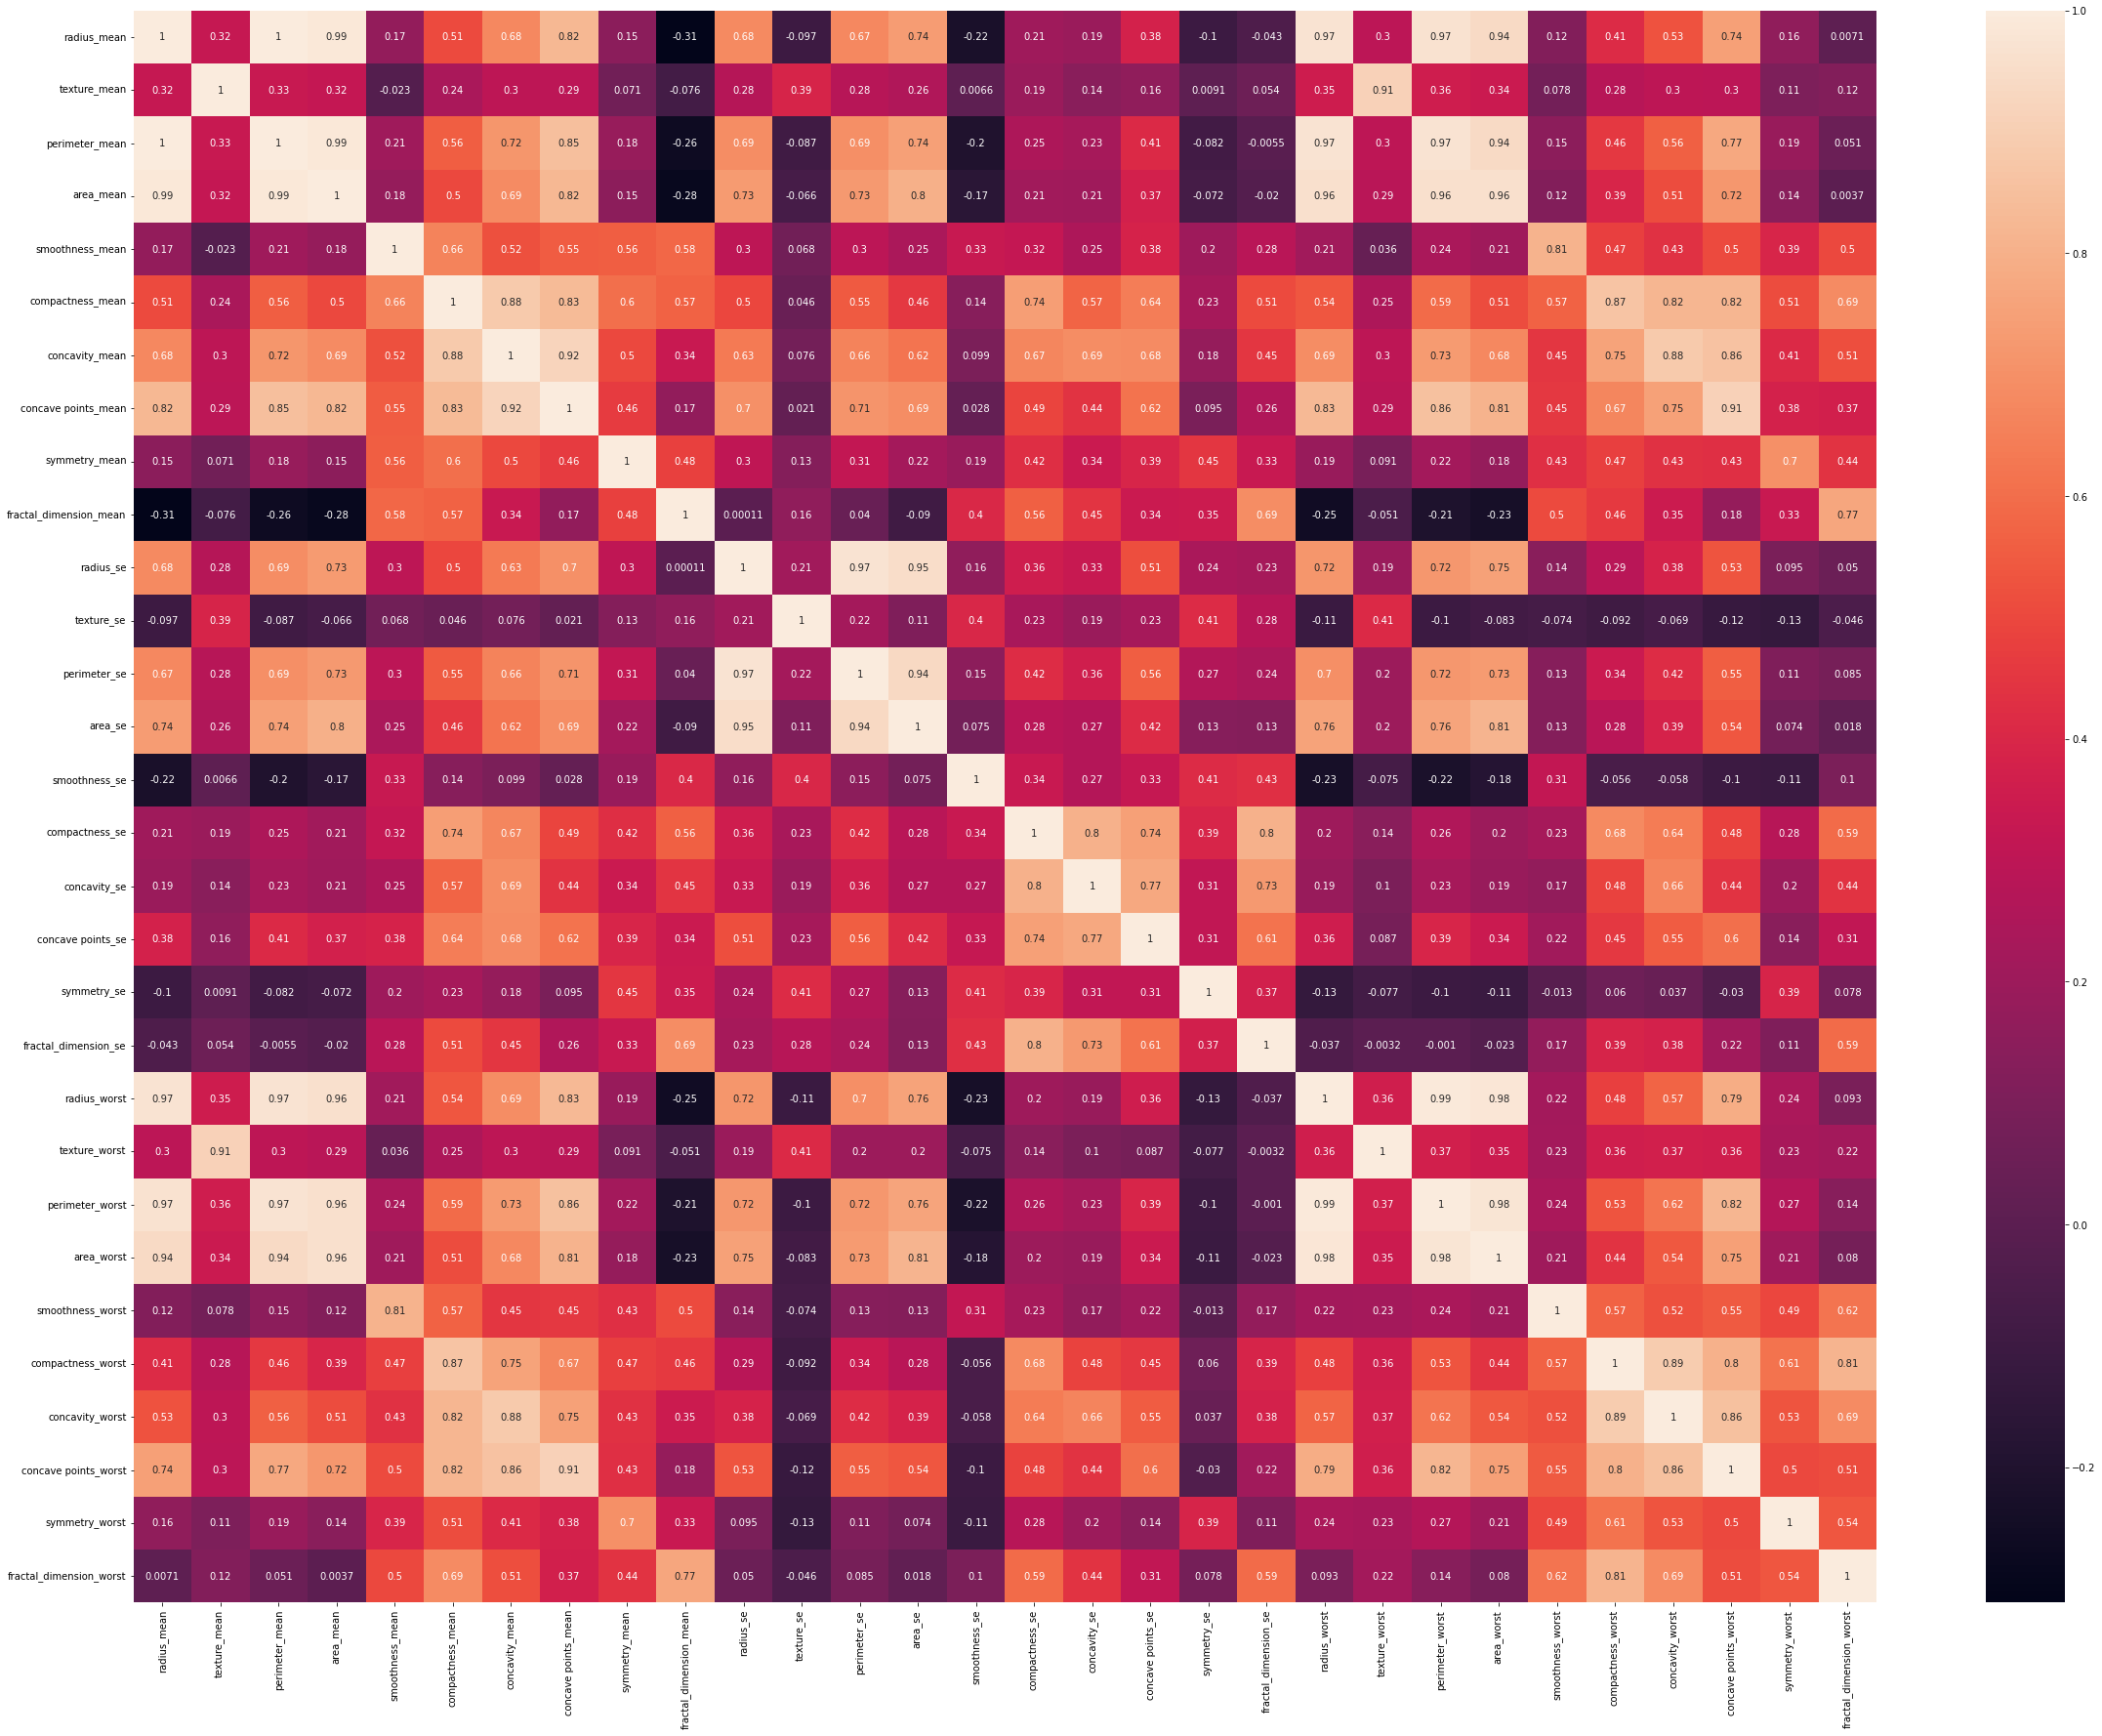

In [17]:
plt.figure(figsize=(40,30))
sns.heatmap(df1.corr(),annot=True)

### 1.9 convert the features into z scores as we do not know what units / scales were used and store them in new dataframe

It is always adviced to scale numeric attributes in models that calculate distances.

In [5]:
df2= df1.apply(zscore)
df2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


### 1.10 Capture the class values from the 'diagnosis' colum.

In [6]:
#encoding the categorical variables "M" and "B" as 1 and 0 for capturing the values for y i.e. target variable.

from sklearn.preprocessing import LabelEncoder                
labelencoder_y=LabelEncoder()
df.iloc[:,0]=labelencoder_y.fit_transform(df.iloc[:,0].values)

df.iloc[:,0]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [22]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,370,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,426,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,406,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,98,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,418,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


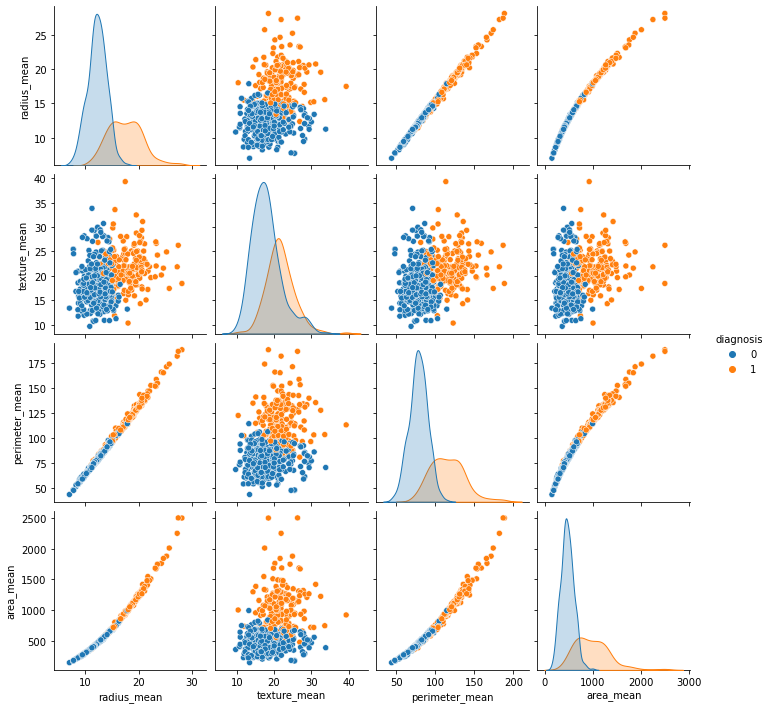

In [47]:
sns.pairplot(df.iloc[:,0:5],hue='diagnosis')

<AxesSubplot:>

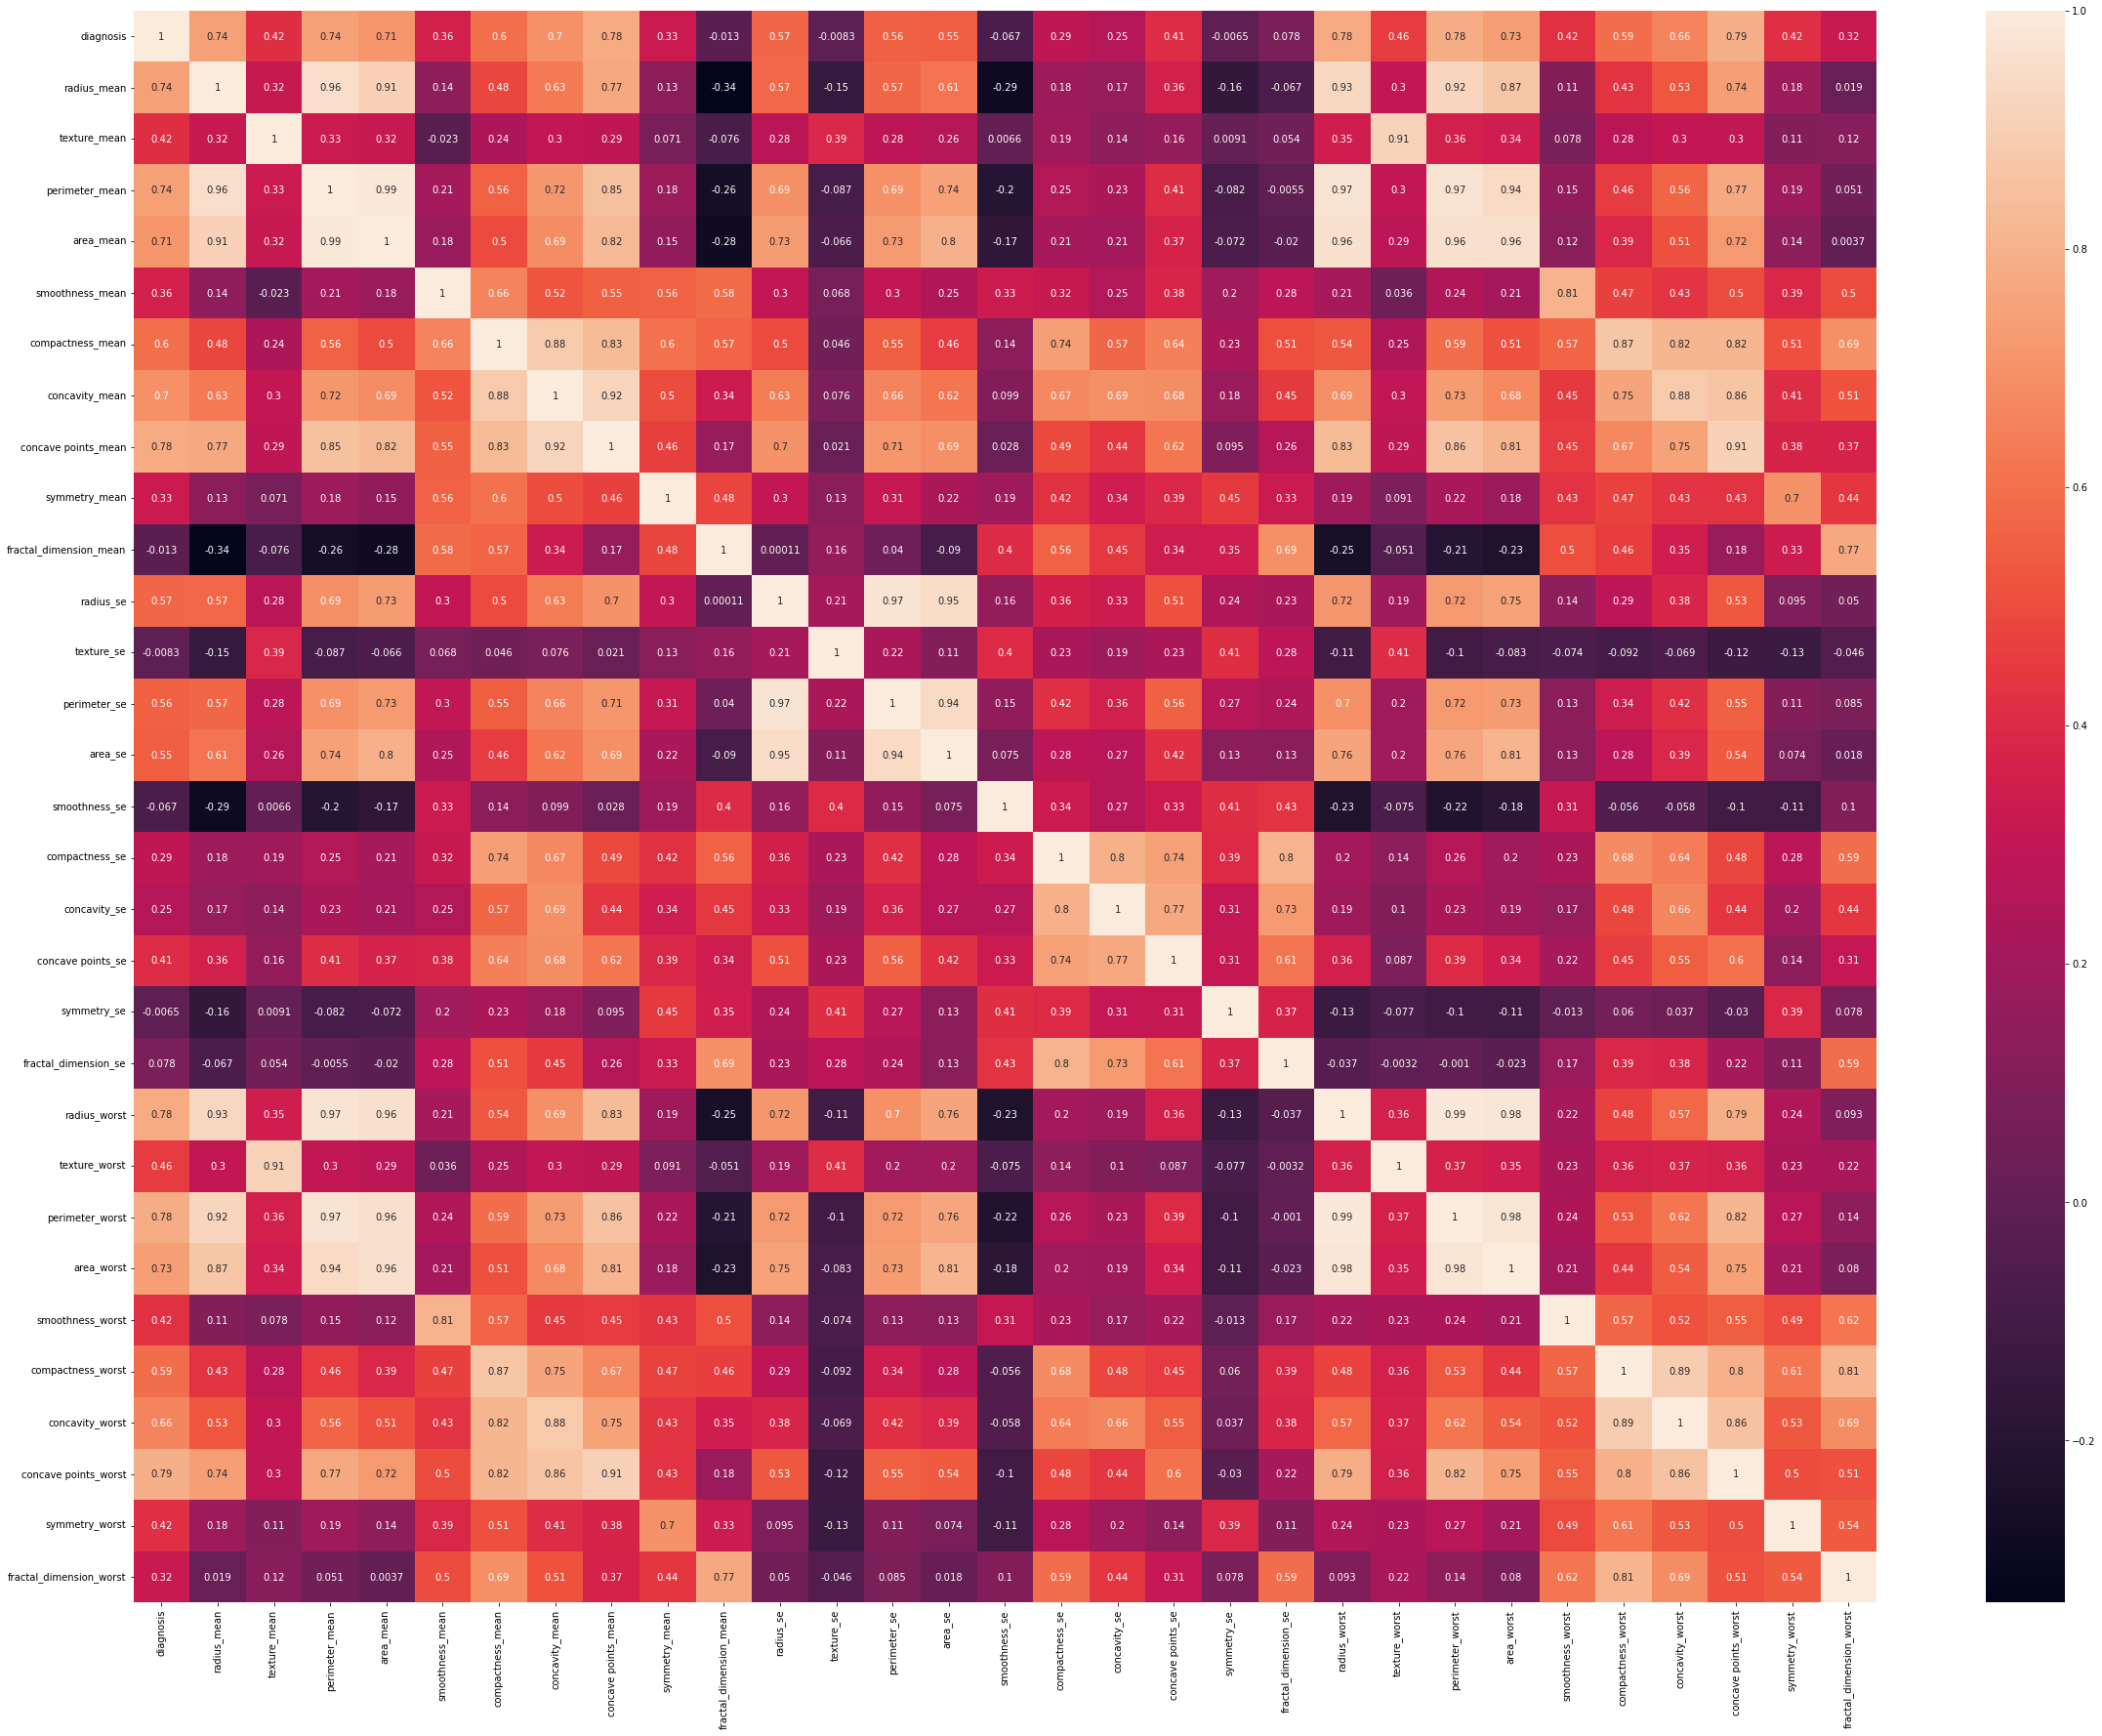

In [23]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)

### 1.11 Extract the independent variable X and dependent variable Y?

In [7]:
X=df2
y=df['diagnosis']

### 1.12 Split the data into train and test set:(70/30)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=7)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=7)

## 1.13 Import all the algorithms we want to test

#### 1.13a) Prepare an array with decision tree and random forest algorithms

In [ ]:
from sklearn.metrics import confusion_matrix


####  1.13b) Prepare the configuration to run the (X,Y),seed=7

In [8]:
def algo(X_train,y_train):
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(random_state =0)
    tree.fit(X_train,y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators = 7,random_state =0)
    forest.fit(X_train,y_train)
    
    print(tree.score(X_train,y_train))
    print(forest.score(X_train,y_train))
    
    return tree,forest

In [48]:
all_algos = algo(X_train,y_train)            #here we can see the accuracy of decision tree and random forest.

1.0
0.9974874371859297


#### 1.13 c) Every algorithm is tested and results are collected and printed?


In [49]:
#Testing the algorithms

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

for i in range(len(all_algos)):
    print("all_algos",i)
    print(classification_report(y_test,all_algos[i].predict(X_test)))
    print('Accuracy: ',accuracy_score(y_test,all_algos[i].predict(X_test)))


all_algos 0
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       110
           1       0.91      0.87      0.89        61

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171

Accuracy:  0.9239766081871345
all_algos 1
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       110
           1       0.97      0.97      0.97        61

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy:  0.9766081871345029


#### 1.13 d) boxplot algorithm comparison

In [52]:
#prediction of decision tree

pred_dtree=all_algos[0].predict(X_test)
print("Predicted Values")
print(pred_dtree)
print("Actual Values")
print(np.array(y_test))

Predicted Values
[0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0]
Actual Values
[0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0]


In [53]:
#prediction of random forest

pred_rfc=all_algos[1].predict(X_test)
print("Predicted Values")
print(pred_rfc)
print("Actual Values")
print(np.array(y_test))

Predicted Values
[0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0]
Actual Values
[0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0]


<AxesSubplot:title={'center':'Random Forest'}>

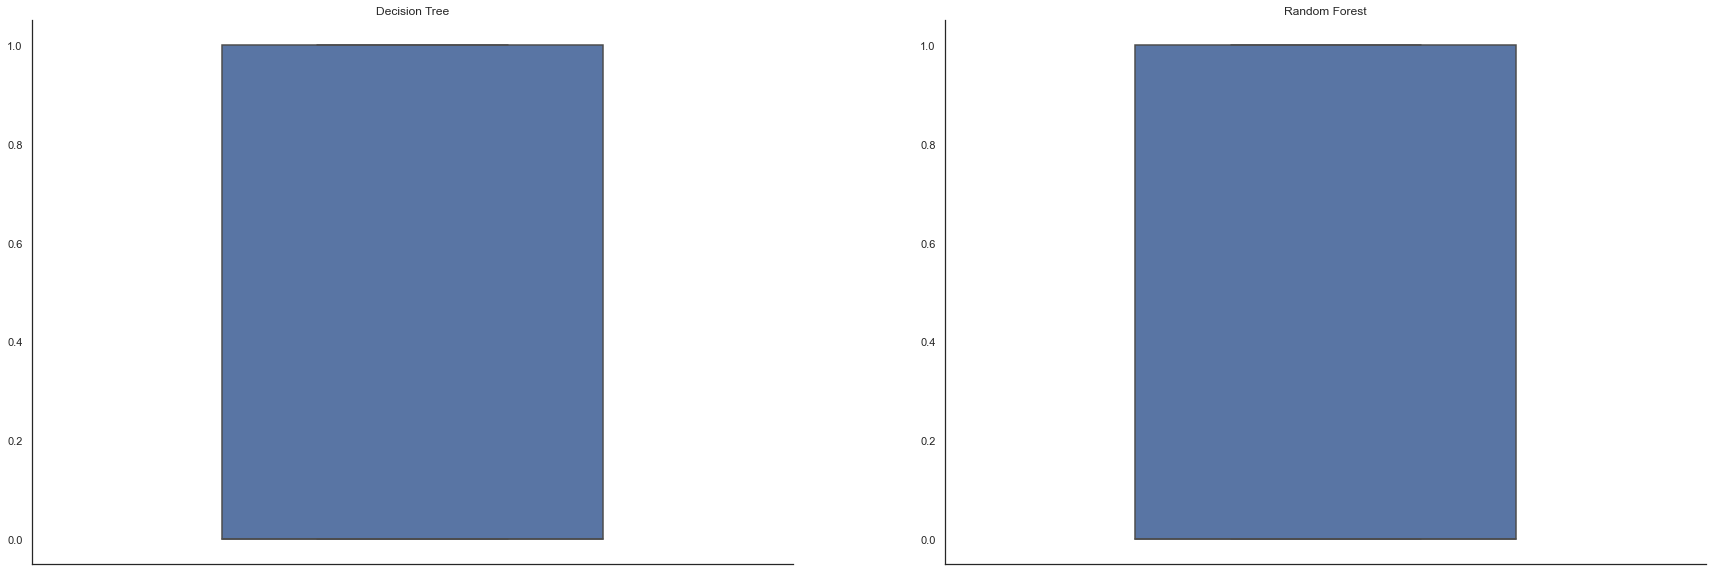

In [57]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.set(style='white')
plt.title('Decision Tree',fontsize=12)
sns.despine()
sns.boxplot(y=pred_dtree,data=df,width = 0.5)

plt.subplot(1,2,2)
sns.set(style='white')
plt.title('Random Forest',fontsize=12)
sns.despine()
sns.boxplot(y=pred_rfc,data=df,width = 0.5)

In [65]:
df_new = pd.DataFrame({'Decision Tree Values': pred_dtree, 'Random Forest Values': pred_rfc})

In [66]:
df_new

,Decision Tree Values,Random Forest Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
166,1,1
167,0,0
168,0,0
169,1,1
